<a href="https://colab.research.google.com/github/Mohamed-Maher5/Supervised-Machine-Learning/blob/main/Regression/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Model Selection
from sklearn.model_selection import train_test_split

## Metrics
from sklearn.metrics import mean_squared_error, r2_score

## Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion

## Models
from sklearn.linear_model import SGDRegressor

**Study the dataset**

In [ ]:
file_path = '/content/housing.csv'
housing_dataset = pd.read_csv(file_path)

In [ ]:
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
## check the info (nulls and datatypes)
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
## some statistics of the dataset
housing_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
## check the nulls
housing_dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Exploratory Data Analysis (EDA)**

Univariate Visualization

categories of (ocean_proximity) : 
 <1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64 



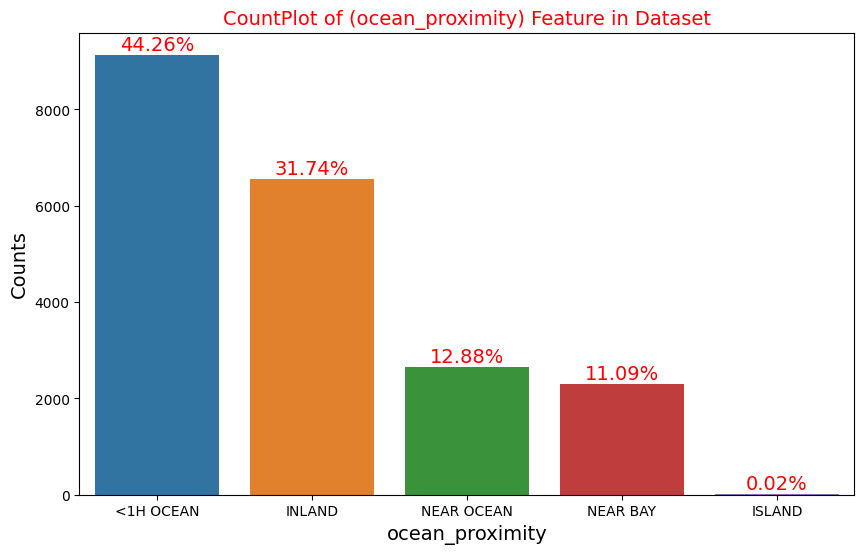

In [ ]:
ocean_values = housing_dataset['ocean_proximity'].value_counts()
print('categories of (ocean_proximity) : \n', ocean_values,'\n')

## plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=housing_dataset, order=ocean_values.index)  ## ordered
plt.title('CountPlot of (ocean_proximity) Feature in Dataset', fontsize=14, c='red')
plt.xlabel('ocean_proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')

## showing the percenatge
for i in range(ocean_values.shape[0]):
    count = ocean_values[i]
    strt='{:0.2f}%'.format(100*count / housing_dataset.shape[0])
    plt.text(i, count+100, strt, ha='center', color='red', fontsize=14)

It shows the number of data points that fall within each bin --



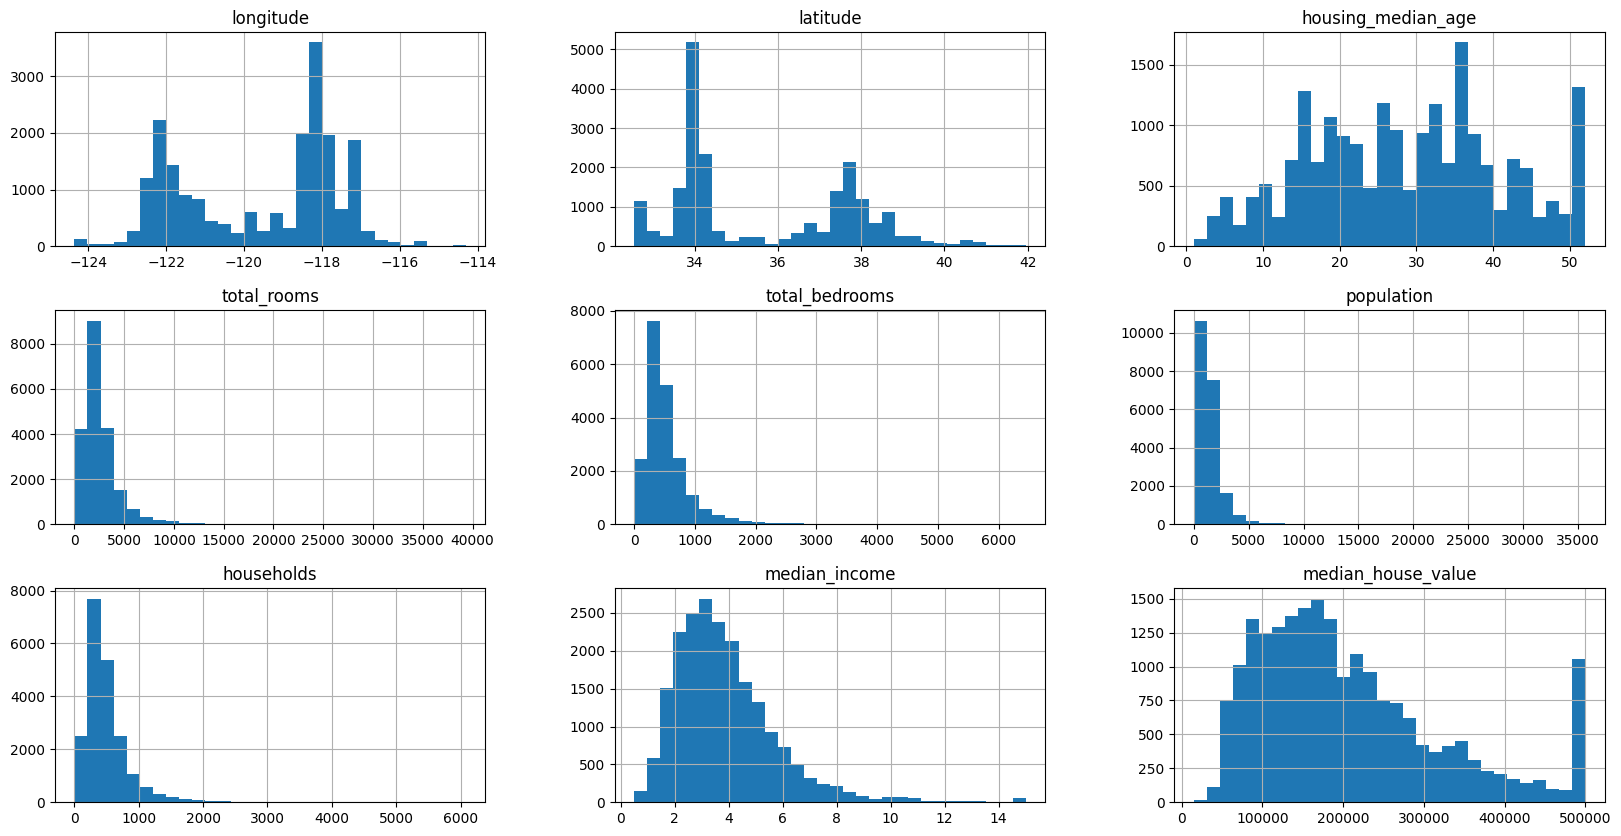

In [ ]:
## Histogram Distribution of Numerical Variables in Dataset
print('It shows the number of data points that fall within each bin --\n')
housing_dataset.hist(bins=30, figsize=(20,10))
plt.show()

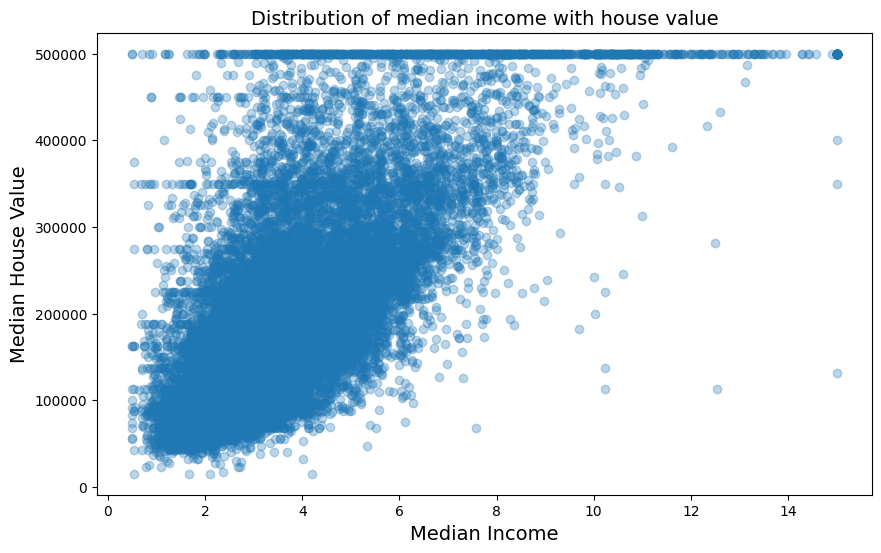

In [ ]:
## scatte plot with important features (median_income) with the target (median_house_value)
plt.figure(figsize=(10, 6))
plt.scatter(housing_dataset['median_income'], housing_dataset['median_house_value'], alpha=0.3)
plt.title('Distribution of median income with house value', fontsize=14, c='k')
plt.xlabel('Median Income', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

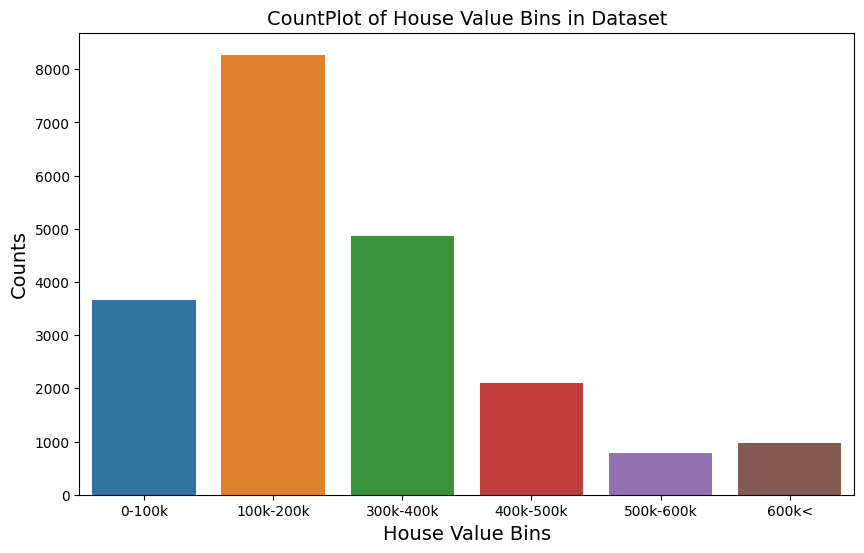

In [ ]:
house_value_bins = pd.cut(x=housing_dataset['median_house_value'],
                          bins=[0, 100000, 200000, 300000, 400000, 500000, np.inf],
                          labels=['0-100k', '100k-200k', '300k-400k', '400k-500k', '500k-600k', '600k<'])

## countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=house_value_bins)
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

*Bivariate Visualization*

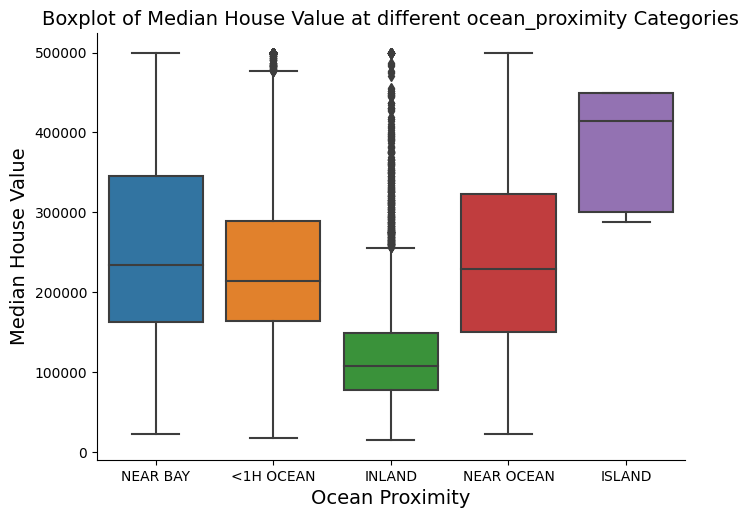

In [ ]:
## Check the Boxplot of the (median_house_value) at different categories of (ocean_proximity)
sns.catplot(y='median_house_value', x='ocean_proximity', data=housing_dataset, kind='box', height=5, aspect=1.4)
plt.title('Boxplot of Median House Value at different ocean_proximity Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

Multivariate Visualization

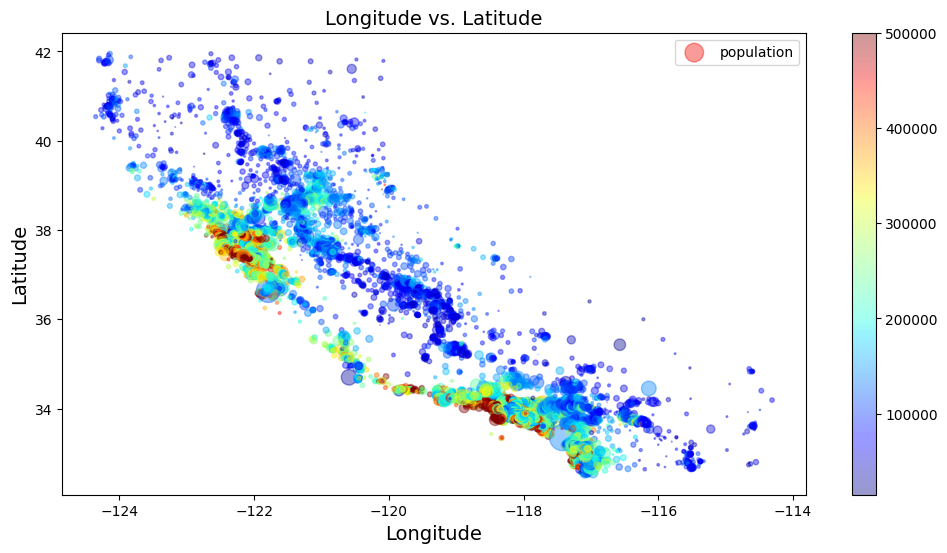

In [ ]:
## Scatter plot for (longitued & latitued), and add population as the size of the point and the color as (house_value)
plt.figure(figsize=(12, 6))
sc = plt.scatter(housing_dataset['longitude'], housing_dataset['latitude'], s=housing_dataset['population']/100,
                   alpha=0.4, c=housing_dataset['median_house_value'], cmap=plt.get_cmap('jet'), label='population')
plt.colorbar(sc)
plt.xlabel('Longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.title('Longitude vs. Latitude', fontsize=14, c='k')
plt.legend()
plt.show()

**Check the Correlation between the Features and the Target**

In [ ]:
## Correlations
housing_dataset.corr()['median_house_value'].sort_values(ascending=False)

<ipython-input-739-252ab0bf86ae>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_dataset.corr()['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<ipython-input-740-95e0a484370f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing_dataset.corr(), annot=True, cmap='Blues')


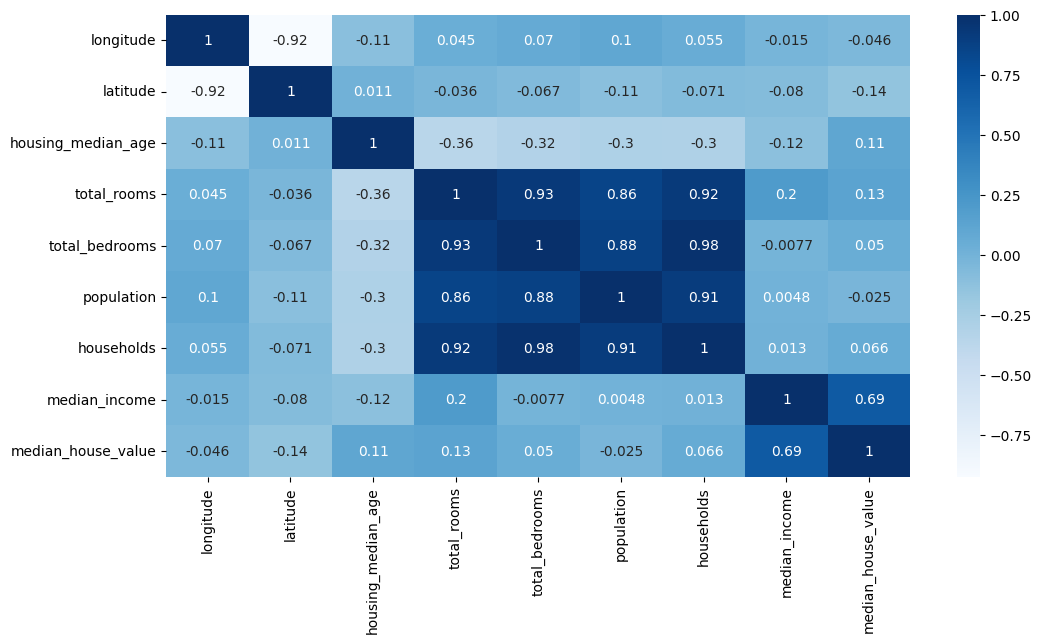

In [ ]:
## heatmap to explain the corelations more
plt.figure(figsize=(12, 6))
sns.heatmap(housing_dataset.corr(), annot=True, cmap='Blues')
plt.show()

**Feature Engineering**

In [ ]:
## Feature Engineering --> Feature Extraction --> increase your dataset with Important Features --> Add the new column to the main DF
housing_dataset['latitude_per_longitude'] = housing_dataset['latitude'] / housing_dataset['longitude']
housing_dataset['bedroms_per_rooms'] = housing_dataset['total_bedrooms'] / housing_dataset['total_rooms']
housing_dataset['house_value_per_income'] = housing_dataset['median_house_value'] / housing_dataset['median_income']

In [ ]:
## check the correlation again
housing_dataset.corr()['median_house_value'].sort_values(ascending=False)  ## some progress for out new features (very good)

<ipython-input-742-eef254a23892>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_dataset.corr()['median_house_value'].sort_values(ascending=False)  ## some progress for out new features (very good)


median_house_value        1.000000
median_income             0.688075
house_value_per_income    0.442203
latitude_per_longitude    0.209051
total_rooms               0.134153
housing_median_age        0.105623
households                0.065843
total_bedrooms            0.049686
population               -0.024650
longitude                -0.045967
latitude                 -0.144160
bedroms_per_rooms        -0.255880
Name: median_house_value, dtype: float64

**Split the Dataset**

In [ ]:
## Split the dataset into features and target
X = housing_dataset.drop(columns=['median_house_value'], axis=1)  ## features
y = housing_dataset['median_house_value']  ## target

In [ ]:
## Split Data into Train_Full and Test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=123, shuffle=True)

## Split Train_Full into Train and Validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.15, random_state=125, shuffle=True)

In [ ]:
## Data shapes
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_valid shape -- ', X_valid.shape)
print('y_valid shape -- ', y_valid.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (14912, 12)
y_train shape --  (14912,)
X_valid shape --  (2632, 12)
y_valid shape --  (2632,)
X_test shape --  (3096, 12)
y_test shape --  (3096,)


**Separate Data into Numerical and Categorical**

In [ ]:
## Separete the columns according to type (numerical or categorical)
num_cols = [col for col in  X_train.columns
             if X_train[col].dtype in ['float64', 'int64']]

categ_cols = [col for col in  X_train.columns
                if X_train[col].dtype not in ['float64', 'int64']]

**PreProcessing Data**

In [ ]:
## Building The pipelines
# Imputer to Fill the Data Null Values
# Scaler to Standerize the Data Values

# Pipline for the numerical variables
num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

## deal with (num_pipline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_num = pd.DataFrame(num_pipline.fit_transform(X_train[num_cols]))
X_valid_num = pd.DataFrame(num_pipline.transform(X_valid[num_cols]))
X_test_num = pd.DataFrame(num_pipline.transform(X_test[num_cols]))

# Pipline for the Categorical variables

categ_pipeline = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse=False))])


## deal with (categ_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_categ = pd.DataFrame(categ_pipeline.fit_transform(X_train[categ_cols]))
X_valid_categ = pd.DataFrame(categ_pipeline.transform(X_valid[categ_cols]))
X_test_categ = pd.DataFrame(categ_pipeline.transform(X_test[categ_cols]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train_categ.rename(columns={0: 13,1:14,2:15,3:16,4:17}, inplace=True)

**Concatenation Numerical and Categorical**

In [ ]:
X_train = pd.concat([X_train_num, X_train_categ], axis=1)
X_valid = pd.concat([X_valid_num, X_valid_categ], axis=1)
X_test =  pd.concat([X_test_num, X_test_categ], axis=1)

In [ ]:
sgd_reg = SGDRegressor(penalty='l2', alpha=0.5,eta0=0.001, shuffle=True, max_iter=10000)
sgd_reg.fit(X_train, y_train)

SGDRegressor(alpha=0.5, eta0=0.001, max_iter=10000)

In [ ]:
## prediction
y_pred_train_sgd = sgd_reg.predict(X_train)  ## predict the training data
y_pred_valid_sgd = sgd_reg.predict(X_valid)  ## predict the training data

## RMSE
rmse_train_sgd = (mean_squared_error(y_train, y_pred_train_sgd))**0.5
rmse_valid_sgd = (mean_squared_error(y_valid, y_pred_valid_sgd))**0.5

## R2 score
r2_train_sgd = r2_score(y_train, y_pred_train_sgd)
r2_valid_sgd = r2_score(y_valid, y_pred_valid_sgd)


print(f'RMSE for training set using SGDRegression -- {rmse_train_sgd:.3f}')
print(f'RMSE for validating set using SGDRegression -- {rmse_valid_sgd:.3f}')
print('**'*40)
print(f'R2 Score for training set using SGDRegression -- {r2_train_sgd:.3f}')
print(f'R2 Score for validating set using SGDRegression -- {r2_valid_sgd:.3f}')

RMSE for training set using SGDRegression -- 58777.055
RMSE for validating set using SGDRegression -- 59005.053
********************************************************************************
R2 Score for training set using SGDRegression -- 0.738
R2 Score for validating set using SGDRegression -- 0.743


In [ ]:
# Get the ACC for the test set in persentage
predictions = sgd_reg.predict(X_test)

# Get the actual labels for the test set
labels = y_test

# Calculate the mean squared error
mse = mean_squared_error(predictions, labels)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the accuracy
accuracy = 1 - (rmse / np.max(labels))

print('The accuracy on the test set is {:.2f}%'.format(accuracy * 100))

The accuracy on the test set is 88.24%
